# Simple Linear Regression

## ***Problem statement***

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.


Data set:





*   Independant variable X: Outside Air Temperature
*   Dependant variable Y: Overall daily revenue generated in dollars






## ***Import Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## ***Import Dataset***

In [3]:
IceCream = pd.read_csv('/content/IceCreamData.csv')

In [4]:
IceCream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## ***Visualize dataset***

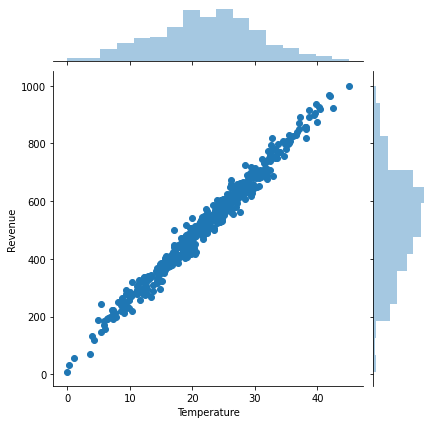

In [8]:
sns.jointplot(x='Temperature',y='Revenue',data=IceCream)

We can see that there is linear relationship between Temperature and Revenue, which is required to solve any linear regression problem

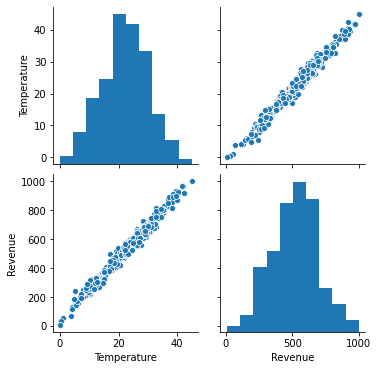

In [9]:
sns.pairplot(IceCream)

From above diagram we conclude that both Temperature and Revenue are uniformly distributed and there is no outlier present in data which is good thing

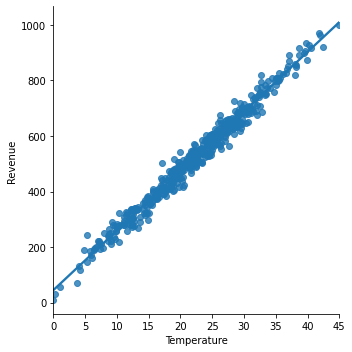

In [10]:
sns.lmplot(x='Temperature',y='Revenue',data=IceCream)

## ***Create Testing and Training dataset***

In [11]:
y = IceCream['Revenue']

In [12]:
X = IceCream[['Temperature']]
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

## ***Train the model***

In [14]:
X_train.shape

(375, 1)

In [15]:
y_train.shape

(375,)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After training the model we get the parameters learned from training like m and b where equation of line y = mx+b

In [18]:
print('Linear Model Coefficient (m) :',regressor.coef_)
print('Linear Model Coefficient (b) :',regressor.intercept_)

Linear Model Coefficient (m) : [21.54991861]
Linear Model Coefficient (b) : 42.96915703520034


## ***Test the model***

In [19]:
y_predict = regressor.predict(X_test)
y_predict

array([794.21441565, 232.41347454, 243.58479699, 797.93728951,
       684.47195036, 310.90230238, 451.39443489, 520.75668813,
       486.10045296, 785.84159733, 391.89030075, 514.8570488 ,
       420.46067534, 527.47162984, 486.79695107, 703.15753158,
       652.03086343, 865.01952343, 452.94797391, 582.92996933,
       546.13894341, 495.66926957, 390.9103529 , 478.84687168,
       605.98753188, 760.90464418, 608.67059415, 539.82868288,
       571.41295819, 524.87710799, 350.34729603, 821.27811712,
       721.17147963, 484.20422627, 517.28015699, 637.72679162,
       456.12516591, 305.65012131, 321.00132177, 168.43994518,
       790.27823617, 559.8362152 , 231.65063177, 678.86834829,
       665.02024949, 523.19940265, 352.85045657, 577.46266813,
       257.4847404 , 250.9580941 , 586.62562801, 640.01092848,
       748.00449763, 290.86859489, 562.6152009 , 413.38958222,
       256.31967107, 656.38614551, 604.95666351, 419.12646924,
       522.42767076, 469.21293941, 799.80556165, 442.75

Text(0.5, 1.0, 'Revenur vs Temperature (training dataset)')

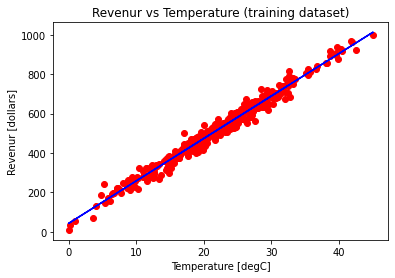

In [23]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.ylabel('Revenur [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenur vs Temperature (training dataset)')

Text(0.5, 1.0, 'Revenur vs Temperature (test dataset)')

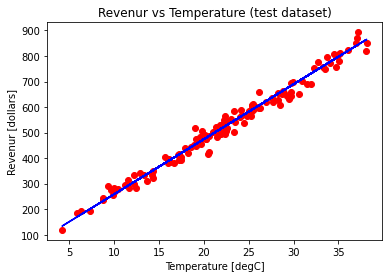

In [25]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,regressor.predict(X_test),color='blue')
plt.ylabel('Revenur [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenur vs Temperature (test dataset)')

In [32]:
y_predict = regressor.predict([[30]])
y_predict

array([689.46671528])

In [34]:
Sample = [[35]]
y_predict = regressor.predict(Sample)
y_predict

array([797.21630832])